<a href="https://colab.research.google.com/github/thepjos/GA-Python-Final-Project-10-2020/blob/main/PY825_Final_Project_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Hypothesis***
## Original - Is there seasonality in freight movements and do they cause volumes and/or rates to meaningfully increase or decrease?

## After some analysis - How has my customer base changed over the last 3 years?

# ***Data Set info***
## This data was obtained from an analyst at my transporation logistics company (aka Freight Brokerage). This is 3 years of shipments for my group's top ten customers. I chose this set because I believed it had a good diversity of datatypes and covered a meaningful time span. Thru my analysis, I learned some faults (of mine) in this process which i will go into more detail below. 

# ***Data Dictionary***

ActivityDate :  Date the shipment was picked up   
CustomerCode :    Unique code for certain customer (C1 - C10 for anonymity)     
OriginCity :    City location of shipper   
OriginState :    State location of shipper   
O3Zip :    First three digits of zip code for origin/shipper   
DestinationCity :   City location of consignee/delivery    
DestinationState :    State location of consignee/delivery   
D3Zip :    First three digits of zip code for destination/delivery   
Rate :    Cost to move the shipment in dollars   
Miles :    Length between origin and destination   
Volume :    Number of shipments in that lane   

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date

In [ ]:
# Used pandas to convert an Excel file to a CSV file and then loaded it onto GitHub.
# Here was the code for sheet 2, commented out after successfully loading on to the website.
      # df['DAT Regions'].to_csv('projectsheet2.csv')

# Bring data in from GitHub to Colab.
url1 = 'https://raw.githubusercontent.com/thepjos/GA-Python-Final-Project-10-2020/main/projectsheet1.csv'
df1 = pd.read_csv(url1)
url2 = 'https://raw.githubusercontent.com/thepjos/GA-Python-Final-Project-10-2020/main/projectsheet2.csv'
df2 = pd.read_csv(url2)

# ***Data cleaning***
## Merge the two dataframes
## Rename the columns
## Get rid of the nulls
## Get rid of the zeros

In [ ]:
# Merge the two dataframes (sheet 1 and 2 from an excel file). This automatically lined up a REGION with the ORIGIN ZIP CODE.
df3 = pd.merge(df1, df2, left_on='O3Zip', right_on='DAT3Zip', how= 'outer')  

In [ ]:
df3.head()

,Unnamed: 0_x,ActivityDate,CustomerCode,OriginCity,OriginState,O3Zip,DestinationCity,DestinationState,D3Zip,Rate,Miles,Volume,Unnamed: 0_y,KeyDATRegion,DATSuperRegion,DATRegion,DATCityState,DATCity,DATState,DAT3Zip,DAT3ZipRef,DATCountry
0,0.0,1/1/2018,C6,CHAMPAIGN,IL,618,London,KY,407,1365.28,369.0,1.0,226.0,227.0,Great Lakes,IL_BLO,"Bloomington, IL",Bloomington,IL,618,617,USA
1,13.0,1/2/2018,C6,CHAMPAIGN,IL,618,FORT WORTH,TX,761,2826.40,819.0,1.0,226.0,227.0,Great Lakes,IL_BLO,"Bloomington, IL",Bloomington,IL,618,617,USA
2,33.0,1/3/2018,C6,CHAMPAIGN,IL,618,Fort Worth,TX,761,2843.55,819.0,1.0,226.0,227.0,Great Lakes,IL_BLO,"Bloomington, IL",Bloomington,IL,618,617,USA
3,34.0,1/3/2018,C6,CHAMPAIGN,IL,618,OPELIKA,AL,368,2521.01,622.0,1.0,226.0,227.0,Great Lakes,IL_BLO,"Bloomington, IL",Bloomington,IL,618,617,USA
4,76.0,1/5/2018,C6,CHAMPAIGN,IL,618,FORT WORTH,TX,761,5671.76,1638.0,2.0,226.0,227.0,Great Lakes,IL_BLO,"Bloomington, IL",Bloomington,IL,618,617,USA


In [ ]:
df3.columns

Index(['Unnamed: 0_x', 'ActivityDate', 'CustomerCode', 'OriginCity',
       'OriginState', 'O3Zip', 'DestinationCity', 'DestinationState', 'D3Zip',
       'Rate', 'Miles', 'Volume', 'Unnamed: 0_y', 'KeyDATRegion',
       'DATSuperRegion', 'DATRegion', 'DATCityState', 'DATCity', 'DATState',
       'DAT3Zip', 'DAT3ZipRef', 'DATCountry'],
      dtype='object')

In [ ]:
# Dropped some columns that came over from Excel but had no value. Also columns from sheet 2 that i did not need for my analysis.
df3.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'KeyDATRegion', 'DATRegion', 'DATCityState',  'DATCity' , 'DATState', 'DAT3Zip', 'DAT3ZipRef' ,'DATCountry'], inplace=True)

In [ ]:
df3

,ActivityDate,CustomerCode,OriginCity,OriginState,O3Zip,DestinationCity,DestinationState,D3Zip,Rate,Miles,Volume,DATSuperRegion
0,1/1/2018,C6,CHAMPAIGN,IL,618,London,KY,407,1365.28,369.0,1.0,Great Lakes
1,1/2/2018,C6,CHAMPAIGN,IL,618,FORT WORTH,TX,761,2826.40,819.0,1.0,Great Lakes
2,1/3/2018,C6,CHAMPAIGN,IL,618,Fort Worth,TX,761,2843.55,819.0,1.0,Great Lakes
3,1/3/2018,C6,CHAMPAIGN,IL,618,OPELIKA,AL,368,2521.01,622.0,1.0,Great Lakes
4,1/5/2018,C6,CHAMPAIGN,IL,618,FORT WORTH,TX,761,5671.76,1638.0,2.0,Great Lakes
...,...,...,...,...,...,...,...,...,...,...,...,...
34947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada West
34948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada West
34949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada West
34950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada West


In [ ]:
df3.columns

Index(['ActivityDate', 'CustomerCode', 'OriginCity', 'OriginState', 'O3Zip',
       'DestinationCity', 'DestinationState', 'D3Zip', 'Rate', 'Miles',
       'Volume', 'DATSuperRegion'],
      dtype='object')

In [ ]:
# Renamed columns to save space and make for easier coding.
df3.rename(columns= {'ActivityDate':'Date', 
                     'CustomerCode': 'Ccode', 
                     'OriginCity':'Ocity', 
                     'OriginState':'Ostate',
                     'DestinationCity':'Dcity',
                     'DestinationState':'Dstate',
                     'DATSuperRegion':'Oregion'}, inplace=True)

In [ ]:
# Dropped the nulls. These were created in the merge. df2 had Canadian regions but df1 had zero Canadian records (origin zips).
df3.dropna(inplace=True)   

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34183 entries, 0 to 34184
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     34183 non-null  object 
 1   Ccode    34183 non-null  object 
 2   Ocity    34183 non-null  object 
 3   Ostate   34183 non-null  object 
 4   O3Zip    34183 non-null  object 
 5   Dcity    34183 non-null  object 
 6   Dstate   34183 non-null  object 
 7   D3Zip    34183 non-null  object 
 8   Rate     34183 non-null  float64
 9   Miles    34183 non-null  float64
 10  Volume   34183 non-null  float64
 11  Oregion  34183 non-null  object 
dtypes: float64(3), object(9)
memory usage: 3.4+ MB


In [ ]:
df3['Rate'].value_counts()

0.00       127
940.09      61
200.00      59
150.00      57
935.91      54
          ... 
3097.79      1
2225.48      1
892.80       1
827.20       1
3273.80      1
Name: Rate, Length: 25290, dtype: int64

In [ ]:
# Clean out Rates that are Zero. No shipment moves for zero dollars so those must be mistakes of some sort. 
df3 = df3[df3['Rate'] != 0]

In [ ]:
df3['Miles'].sort_values(ascending=False)

23270    23568.0
24595    19400.0
28604    18855.0
23275    17676.0
32355    14645.0
          ...   
24656        0.0
24654        0.0
24652        0.0
24651        0.0
28025        0.0
Name: Miles, Length: 34056, dtype: float64

In [ ]:
# Mostly "round trip" loads. Skewing up the data. Removing them.
df3[df3['Miles'] == 0]              

,Date,Ccode,Ocity,Ostate,O3Zip,Dcity,Dstate,D3Zip,Rate,Miles,Volume,Oregion
184,9/26/2018,C6,CHAMPAIGN,IL,618,University Park,IL,604,706.45,0.0,1.0,Great Lakes
1075,1/20/2018,C2,KENTWOOD,MI,495,Lithia Springs,GA,303,2408.68,0.0,1.0,Great Lakes
1114,7/6/2018,C3,GRAND RAPIDS,MI,495,GRAND RAPIDS,MI,495,342.38,0.0,1.0,Great Lakes
1449,3/1/2018,C2,WYTHEVILLE,VA,243,Austinburg,OH,440,986.81,0.0,1.0,Lower Atlantic
1551,1/19/2018,C2,St Louis,MO,631,CARLISLE,PA,170,440.00,0.0,1.0,Lower Midwest
...,...,...,...,...,...,...,...,...,...,...,...,...
32483,4/10/2019,C3,WILMINGTON,MA,18,WILMINGTON,MA,18,372.32,0.0,1.0,New England
32692,3/21/2018,C9,HOUSTON,TX,773,HOUSTON,TX,770,289.36,0.0,1.0,South Central
32877,5/8/2019,C3,LIVONIA,MI,481,LIVONIA,MI,481,291.13,0.0,1.0,Great Lakes
33275,12/21/2018,C1,Chicago,IL,606,Chicago,IL,606,950.00,0.0,1.0,Great Lakes


In [ ]:
df3 = df3[df3['Miles'] != 0]   

#***Data Wrangling***
## Concatenate the cities and states into a "lane"         
## Convert the Date column to DateTime for easier manipulation

In [ ]:
# Make a "Lane" column which describes the entire shipment better, from one place to another.
def make_lane(Orcity, Orstate, Decity, Destate):
  return(f'{Orcity}, {Orstate} - {Decity}, {Destate}')
df3['Lane'] =  df3.apply(lambda x : make_lane(x['Ocity'], x['Ostate'], x['Dcity'], x['Dstate']), axis=1)

In [ ]:
# Break up the date into a month and year format to look at seasonal trends.
df3['Date'] = pd.to_datetime(df3['Date'])

# **Analysis**
## Look for seasonal trends
## Look at individual customer trends


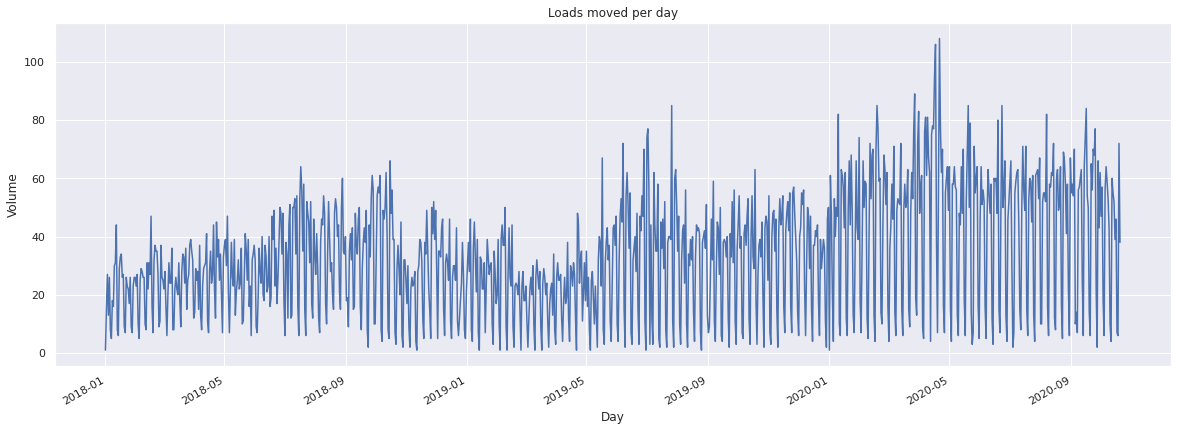

In [ ]:
# Start to look for seasonality over the 3 years of data.
loads_per_day = df3.groupby(['Date']).size()
loads_per_day.plot(kind= 'line', figsize=(20,7), x = 'Day', y = 'Volume');
plt.xlabel('Day')
plt.ylabel('Volume')
plt.title('Loads moved per day')
plt.show();

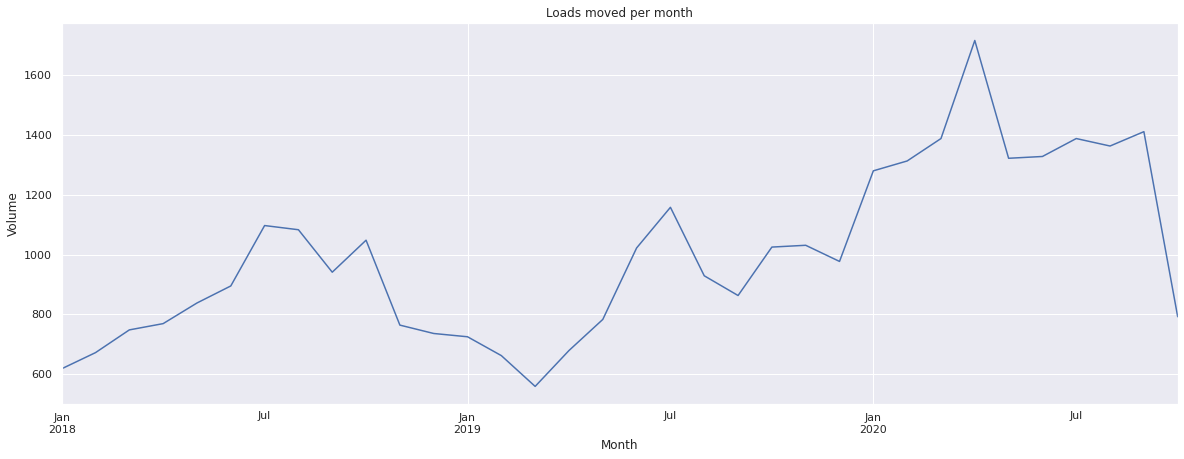

In [ ]:
# Try to look at it by month to get a more clear picture of the 3 years of data. 
df3['Month_Year'] = pd.to_datetime(df3['Date']).dt.to_period('M')
loads_per_month = df3.groupby(['Month_Year']).size()
loads_per_month.plot(kind= 'line', figsize=(20,7), x = 'Month', y = 'Volume');
plt.xlabel('Month')
plt.ylabel('Volume')
plt.title('Loads moved per month')
plt.show();

# This did not show great seasonality b/c
# I think its obvious that volumes went up overall, over time
# Which is most likely due to a shift in customers over time. Top 10 customers changed/evolved over time. 

# **This is when i realized that my hypothesis did not align with the data set which i was provided. UGH.**

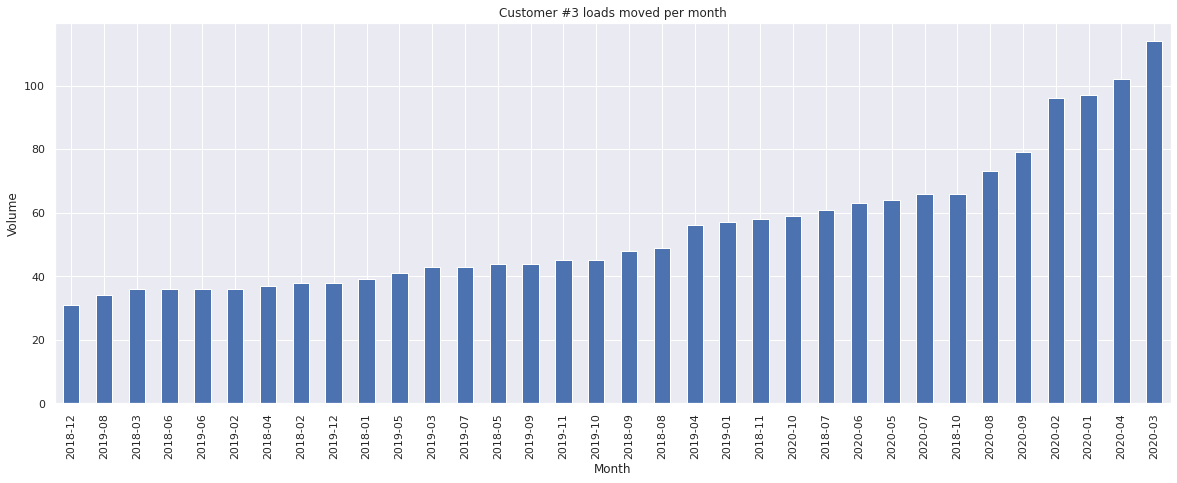

In [ ]:
# For example, when I isolate customer 3, we see that they only recently began moving ALOT of volume.
c3 = df3[df3['Ccode'] == 'C3']   
c3mo = c3['Month_Year'].value_counts(ascending=True)      
c3mo.plot(kind='bar', figsize=(20,7), x = 'Month', y = 'Volume')
plt.xlabel('Month')
plt.ylabel('Volume')
plt.title('Customer #3 loads moved per month')
plt.show();

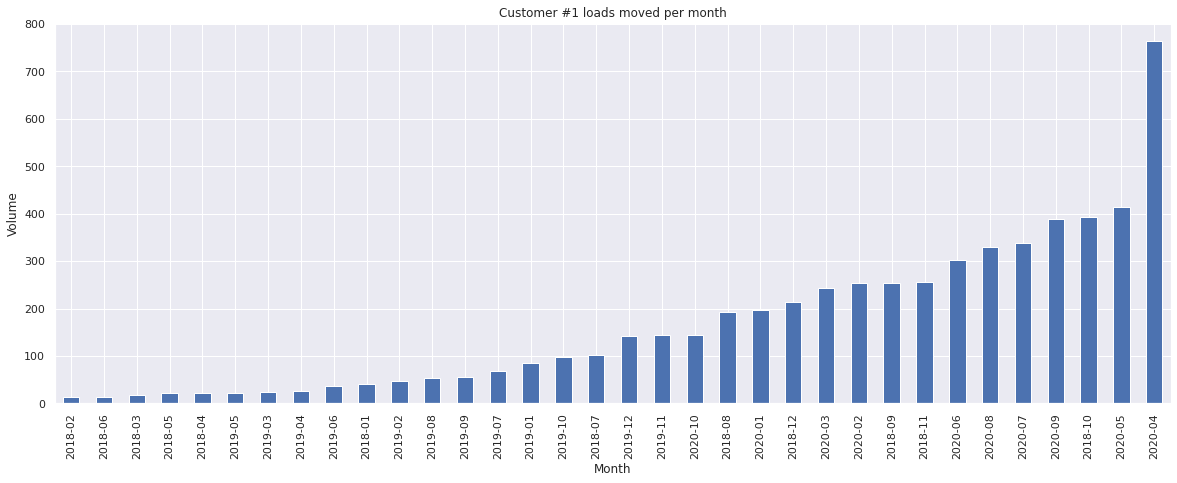

In [ ]:
# Same with customer #1, but even more glaring.
c1 = df3[df3['Ccode'] == 'C1'] 
c1mo = c1['Month_Year'].value_counts(ascending=True)      
c1mo.plot(kind='bar', figsize=(20,7), x = 'Month', y = 'Volume')
plt.xlabel('Month')
plt.ylabel('Volume')
plt.title('Customer #1 loads moved per month')
plt.show();

In [ ]:
# Worked to pull out data for each year separately.
date_from_18 = pd.Timestamp(date(2018,1,1))                      
date_to_18 = pd.Timestamp(date(2019,1,1))
date_from_19 = pd.Timestamp(date(2019,1,1))                      
date_to_19 = pd.Timestamp(date(2020,1,1))
date_from_20 = pd.Timestamp(date(2020,1,1))                      
date_to_20 = pd.Timestamp(date(2020,12,31))

In [ ]:
# Created a year and month column.
df3['Year'] = pd.DatetimeIndex(df3['Date']).year                           
df3['Month'] = pd.DatetimeIndex(df3['Date']).month
df3['Week'] = pd.DatetimeIndex(df3['Date']).week

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  after removing the cwd from sys.path.


In [ ]:
df_2018 = df3[                                                  
              (df3['Date'] > date_from_18) &
              (df3['Date'] < date_to_18)]    
df_2019 = df3[                                                  
              (df3['Date'] > date_from_19) &
              (df3['Date'] < date_to_19)]    
df_2020 = df3[                                                  
              (df3['Date'] > date_from_20) &
              (df3['Date'] < date_to_20)]    

In [ ]:
# Look at total volumes by month, for each individual year.
vols_per_mo_18 = df_2018.groupby('Month')['Volume'].sum()
vols_per_mo_19 = df_2019.groupby('Month')['Volume'].sum()
vols_per_mo_20 = df_2020.groupby('Month')['Volume'].sum()

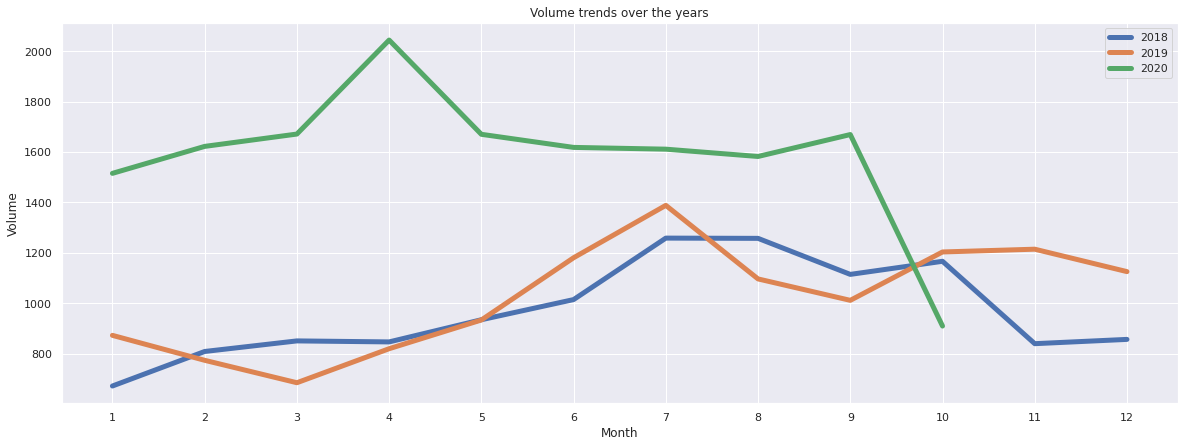

In [ ]:
# Plot them stacked on each other to look for seasonality.
vols_per_mo_18.plot(kind='line', figsize=(20,7), label='2018',linewidth=5)
vols_per_mo_19.plot(kind='line', label='2019', linewidth=5 )
vols_per_mo_20.plot(kind='line', label='2020' , linewidth=5 )
plt.title('Volume trends over the years')
plt.xticks(np.arange(1,13,1))
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.show();

# When stacked by monthly volumes over 3 years, seasonality was not clear. 2020 also showed much higher volumes (concentrated in my top ten) and the impact of the COVID disruption.

# **More Data Analysis**   
## What percentage of freight is moved by each customer?
## What is our average length of lane we move?
## What percentage of freight falls in each region?
## What lanes do we move the most often?


In [ ]:
print(f'Percentage of total freight moved for each Customer')
round(df3['Ccode'].value_counts()/df3.shape[0],3) * 100

Percentage of total freight moved for each Customer


C1     16.9
C10    12.3
C6     10.8
C2      9.9
C5      9.9
C4      9.8
C7      9.4
C8      8.1
C9      7.4
C3      5.5
Name: Ccode, dtype: float64

In [ ]:
# Look at customer, by year, and how that distribution changed over time. 
cust_2018 = df_2018.groupby('Ccode')['Volume'].sum()
cust_2019 = df_2019.groupby('Ccode')['Volume'].sum()
cust_2020 = df_2020.groupby('Ccode')['Volume'].sum()

In [ ]:
customer_makeup_2018 = round(cust_2018 / df_2018['Volume'].sum() *100,2)
customer_makeup_2019 = round(cust_2019 / df_2019['Volume'].sum() *100,2)
customer_makeup_2020 = round(cust_2020 / df_2020['Volume'].sum() *100,2)

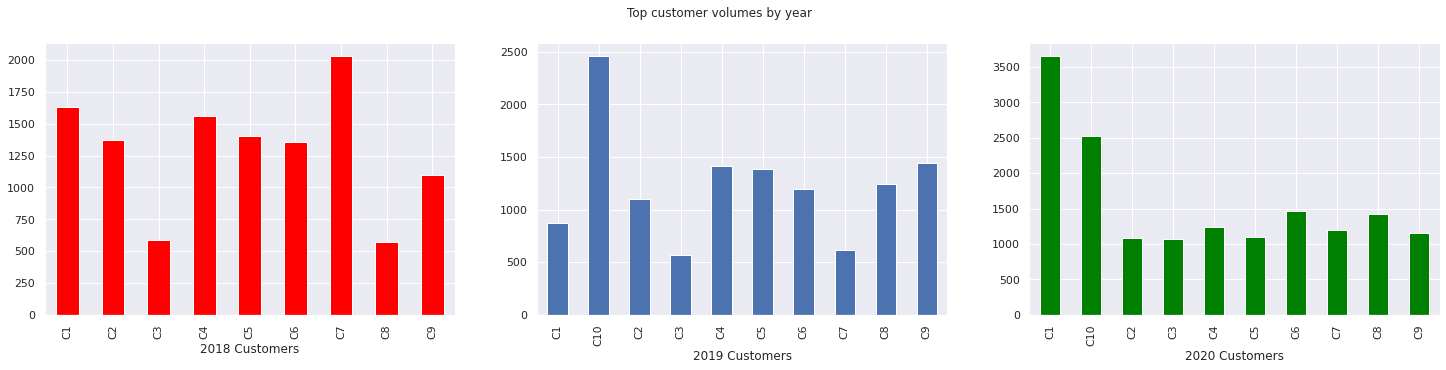

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(25, 5))                   
fig.suptitle('Top customer volumes by year')
cust_2018.plot(kind='bar', ax= ax1, xlabel='2018 Customers', color='Red')
cust_2019.plot(kind='bar', ax= ax2, xlabel='2019 Customers')
cust_2020.plot(kind='bar', ax= ax3, xlabel='2020 Customers', color='Green')
plt.show();

# Notice that Customer #10 is our second largest customer in year 2 after not doing any business with them in year 1. 

In [ ]:
# Looking at length of lanes. Create a column to start. 
df3['Lane_Miles'] = df3['Miles'] / df3['Volume']          
df3['Avg_Rate'] = df3['Rate'] / df3['Volume'] 

In [ ]:
df3['Lane_Miles'].sort_values(ascending=False)

13178    4114.0
2072     3106.0
1667     3028.0
32624    3016.0
32623    3016.0
          ...  
6810        2.0
23830       2.0
11818       1.0
17763       1.0
11843       1.0
Name: Lane_Miles, Length: 33923, dtype: float64

In [ ]:
# Found one lane that was 1000 miles longer than the next longest. Determined it was a unique move that could be dropped from the set. 
df3 = df3[df3.Lane_Miles != 4114.0]                                      

In [ ]:
# Although the average of our lanes is about 638 miles, lets put on a graph to see the distribution.
round(df3['Lane_Miles'].mean(),2)

637.95

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


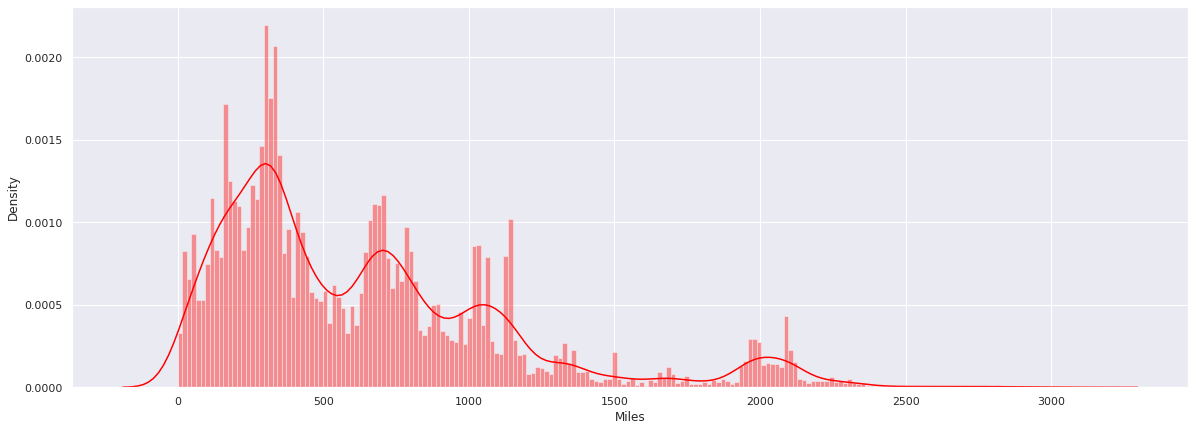

In [ ]:
# Visual of distribution of mileage per lane.
sns.set(rc={'figure.figsize':(20,7)})
sns.distplot(df3['Lane_Miles'], bins=200, color='Red', axlabel= 'Miles') 
plt.show()

In [ ]:
print(f'Percentage of total freight originating in each Region')
round(df3['Oregion'].value_counts()/df3.shape[0], 3) * 100

Percentage of total freight originating in each Region


Great Lakes           52.9
Pacific Northwest     10.6
Upper Atlantic        10.1
Southeast              4.5
Ohio River             3.7
South Central          3.6
Upper Midwest          2.8
Lower Atlantic         2.7
Lower Midwest          2.4
Carolinas              1.8
Lower Mountain         1.6
Florida-So Georgia     1.6
California             1.2
New England            0.5
Upper Mountain         0.0
Name: Oregion, dtype: float64

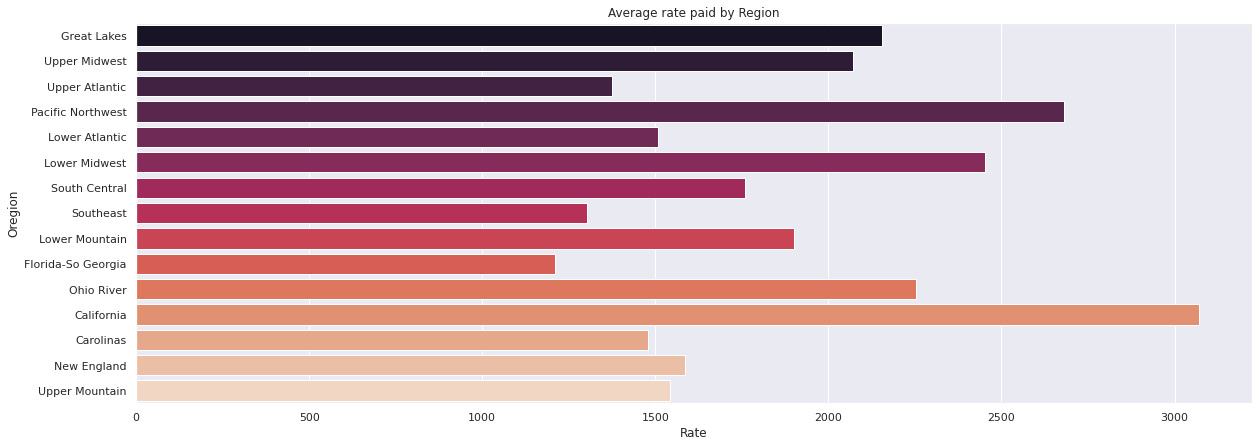

In [ ]:
# Average rate paid by region.
sns.barplot(x='Rate', y='Oregion', data=df3, estimator=np.mean, ci=None, palette="rocket")
plt.title('Average rate paid by Region')
plt.show()

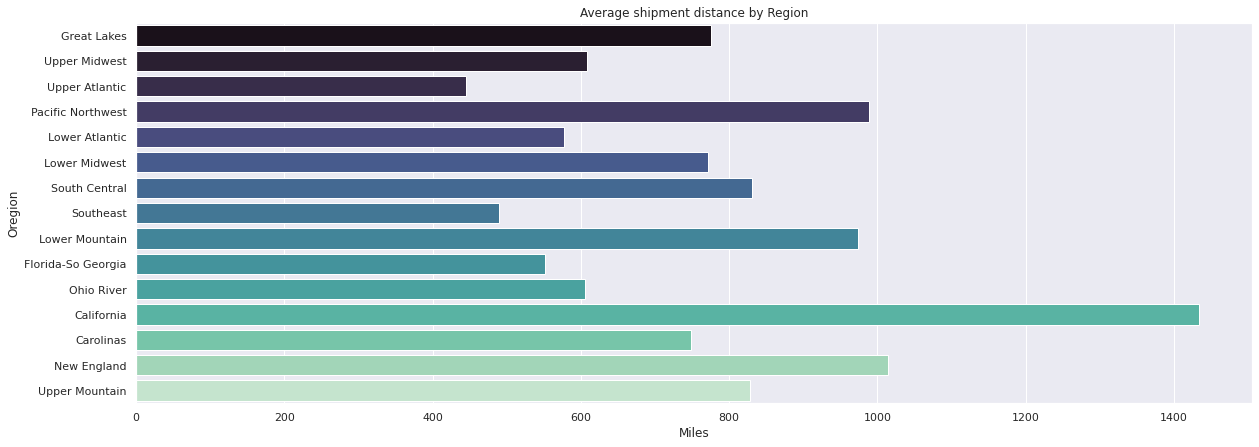

In [ ]:
# Average shipment distance by region.
sns.barplot(x='Miles', y='Oregion', data=df3, estimator=np.mean, ci=None, palette="mako")
plt.title('Average shipment distance by Region')
plt.show()

In [ ]:
# What lanes do we move the most often?
temp = (df3['Lane'].value_counts(dropna=False)).to_frame()
temp.index.rename('Lane_Name', inplace=True)
temp.rename(columns={'Lane':'Total'}, inplace=True)
temp.head()                                                           #top 5 lanes moved over last three years 

,Total
Lane_Name,
"Browns Summit, NC - Shippensburg, PA",344
"Romeoville, IL - LAKE ORION, MI",326
"TOPPENISH, WA - NORTH SALT LAKE, UT",292
"TOPPENISH, WA - VERNON, CA",257
"TOPPENISH, WA - FRESNO, CA",251


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


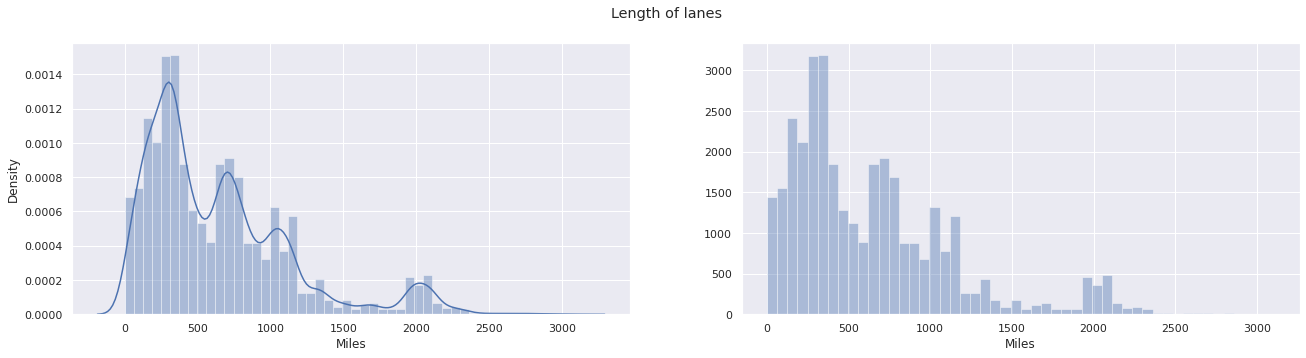

In [ ]:
# Created two grids just to show the peak mile range a little more clear, using KDE.
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(22, 5))
fig.suptitle('Length of lanes')
# On ax1, plot both a frequency histogram AND a kde
sns.distplot(df3['Lane_Miles'], ax=ax1)
ax1.set_xlabel('Miles')
# On ax2, plot a regular frequency histogram WITHOUT a kde
sns.distplot(df3['Lane_Miles'], kde=False, ax=ax2)
ax2.set_xlabel('Miles')       
plt.show();

In [ ]:
df3.columns

Index(['Date', 'Ccode', 'Ocity', 'Ostate', 'O3Zip', 'Dcity', 'Dstate', 'D3Zip',
       'Rate', 'Miles', 'Volume', 'Oregion', 'Lane', 'Month_Year', 'Year',
       'Month', 'Week', 'Lane_Miles', 'Avg_Rate'],
      dtype='object')

In [ ]:
df3

,Date,Ccode,Ocity,Ostate,O3Zip,Dcity,Dstate,D3Zip,Rate,Miles,Volume,Oregion,Lane,Month_Year,Year,Month,Week,Lane_Miles,Avg_Rate
0,2018-01-01,C6,CHAMPAIGN,IL,618,London,KY,407,1365.28,369.0,1.0,Great Lakes,"CHAMPAIGN, IL - London, KY",2018-01,2018,1,1,369.0,1365.28
1,2018-01-02,C6,CHAMPAIGN,IL,618,FORT WORTH,TX,761,2826.40,819.0,1.0,Great Lakes,"CHAMPAIGN, IL - FORT WORTH, TX",2018-01,2018,1,1,819.0,2826.40
2,2018-01-03,C6,CHAMPAIGN,IL,618,Fort Worth,TX,761,2843.55,819.0,1.0,Great Lakes,"CHAMPAIGN, IL - Fort Worth, TX",2018-01,2018,1,1,819.0,2843.55
3,2018-01-03,C6,CHAMPAIGN,IL,618,OPELIKA,AL,368,2521.01,622.0,1.0,Great Lakes,"CHAMPAIGN, IL - OPELIKA, AL",2018-01,2018,1,1,622.0,2521.01
4,2018-01-05,C6,CHAMPAIGN,IL,618,FORT WORTH,TX,761,5671.76,1638.0,2.0,Great Lakes,"CHAMPAIGN, IL - FORT WORTH, TX",2018-01,2018,1,1,819.0,2835.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34180,2020-09-30,C3,Center,CO,811,PUEBLO,CO,810,620.36,326.0,2.0,Lower Mountain,"Center, CO - PUEBLO, CO",2020-09,2020,9,40,163.0,310.18
34181,2020-10-01,C3,Center,CO,811,PUEBLO,CO,810,470.36,158.0,1.0,Lower Mountain,"Center, CO - PUEBLO, CO",2020-10,2020,10,40,158.0,470.36
34182,2020-10-12,C3,Center,CO,811,PUEBLO,CO,810,468.82,158.0,1.0,Lower Mountain,"Center, CO - PUEBLO, CO",2020-10,2020,10,42,158.0,468.82
34183,2020-10-02,C6,Clovis,NM,881,JOLIET,IL,604,2692.66,1109.0,1.0,Lower Mountain,"Clovis, NM - JOLIET, IL",2020-10,2020,10,40,1109.0,2692.66
